In [1]:
import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

In [2]:
theta = np.arange(0,np.pi,0.001)   # start,stop,step

scale = 1

cos_theta = np.cos(theta)

phi_theta = 3*np.cos(0.5*theta-3/2*np.pi)+1

phi_linear = -(1+2 * np.cos(0.5))/np.pi * theta + np.cos(0.5)

phi_large = -0.876996 * theta + 0.5

phi_zero = -0.876996 * theta

phi_log =  -np.log(theta+1)+1

sphereFace = np.cos(1.35 * theta)

arcFace = np.cos(theta+0.5)

cosFace = np.cos(theta)-0.35

cm1 = np.cos(theta+0.3)-0.2

cm2 = np.cos(0.9*theta +0.4) - 0.15

y = 340/(19*np.pi**2) * theta**2 - 397/(19*np.pi) * theta+1

linear_arcface = (np.pi- 2 * theta)/np.pi

li_margin_arcface = (np.pi- 2 * (theta+0.45))/np.pi

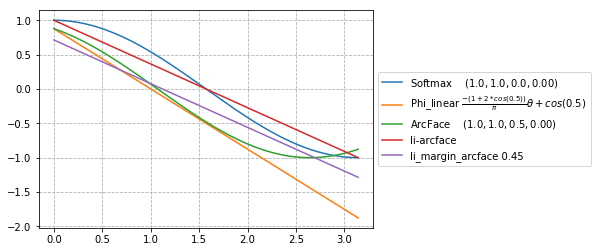

In [3]:
plt.plot(theta, cos_theta,  label='Softmax    $(1.0, 1.0, 0.0, 0.00)$')
#plt.plot(theta, phi_theta,  label='Phi_theta  $(3.0, 0.5, -4.71, -1)$')
plt.plot(theta, phi_linear, label=r'Phi_linear $\frac{-(1+2*cos(0.5))}{\pi}\theta+cos(0.5)$')
#plt.plot(theta, phi_large,  label=r'large_linear')
#plt.plot(theta, phi_zero,   label=r'Phi_zero')
#plt.plot(theta, sphereFace, label='SphereFace $(1.0, 1.35, 0.0, 0.00)$')
plt.plot(theta, arcFace,    label='ArcFace    $(1.0, 1.0, 0.5, 0.00)$')
#plt.plot(theta, cosFace,    label='CosFace    $(1.0, 1.0, 0.0, 0.35)$')
plt.plot(theta, linear_arcface, label='li-arcface')
plt.plot(theta, li_margin_arcface, label='li_margin_arcface 0.45')
#plt.plot(theta, cm1,        label='CM1        (1.0, 1.0, 0.3, 0.20)')
#plt.plot(theta, cm2,        label='CM1        (1.0, 0.9, 0.4, 0.15)' )
#plt.plot(theta, y,          label='y theta 10')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(linestyle='--')
plt.show()

In [4]:
start = -4
stop = 4

step = 0.01

def compute_smooth_x(sigma):
    sigma_y = 1.0/(sigma**2)

    x_neg_1 = np.arange(start, -1*sigma_y, step)   # start,stop,step
    x_neg_2 = np.arange(-1*sigma_y, 0, step)   # start,stop,step

    x_pos_1 = np.arange(0, sigma_y, step)   # start,stop,step
    x_pos_2 = np.arange(sigma_y, stop, step)   # start,stop,step
    
    x_center = np.concatenate((x_neg_2, x_pos_1))
    smooth_x_center = (sigma * x_center)**2 / 2

    smooth_x_left = np.abs(x_neg_1) - 0.5/ (sigma**2)
    smooth_x_right = np.abs(x_pos_2) - 0.5/ (sigma**2)
    smooth_x = np.concatenate((smooth_x_left, smooth_x_center, smooth_x_right))
    
    x = np.concatenate((x_neg_1, x_neg_2, x_pos_1, x_pos_2))
    return x, smooth_x
    

x = np.arange(start, stop, step)   # start,stop,step
square_x = x**2

abs_x = np.abs(x)

x_sigma_1, smooth_x_sigma_1 = compute_smooth_x(1.0)

x_sigma_3, smooth_x_sigma_3 = compute_smooth_x(3.0)


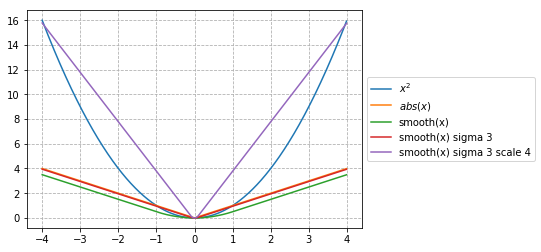

In [5]:
plt.plot(x, square_x,  label='$x^2$')
plt.plot(x, abs_x,     label='$abs(x)$')
plt.plot(x_sigma_1, smooth_x_sigma_1,  label='smooth(x)')
plt.plot(x_sigma_3, smooth_x_sigma_3,  label='smooth(x) sigma 3')

plt.plot(x_sigma_3, 4.0*smooth_x_sigma_3,  label='smooth(x) sigma 3 scale 4')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(linestyle='--')
plt.show()

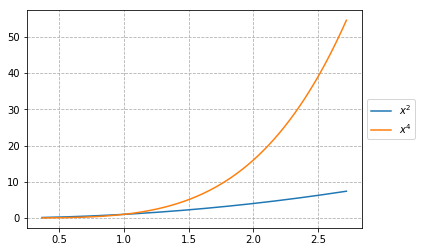

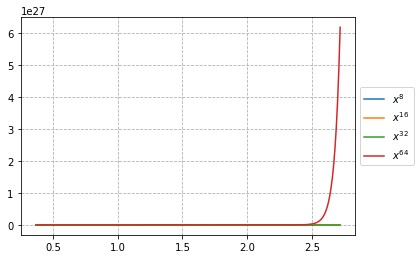

In [6]:
x = np.arange(np.exp(-1), np.exp(1), 0.01)   # start,stop,step

y_2 = x**2
y_4 = x**4
y_8 = x**8
y_16 = x**16
y_32 = x**32
y_64 = x**64


plt.plot(x, y_2,  label='$x^{2}$')
plt.plot(x, y_4,  label='$x^{4}$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(linestyle='--')
plt.show()

plt.plot(x, y_8,  label='$x^{8}$')
plt.plot(x, y_16,  label='$x^{16}$')
plt.plot(x, y_32,  label='$x^{32}$')
plt.plot(x, y_64,  label='$x^{64}$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(linestyle='--')
plt.show()